We have 5 csv files to load our data
Data

1. CPIAUCSL.csv - Inflation measure
2. RRVRUSQ156N.csv - Rental vacancy rate calculated QUARTERLY
3. MORTGAGE30US.csv - Mortgage interest rate calculated WEEKLY
4. Metro_zhvi_uc_sfrcondo.csv - median sale price for US houses
5. Metro_median_sale_price_uc_sfrcondo_week.csv - Home value index data provided by Zillow (https://www.zillow.com/research/data/)

In [1]:
import pandas as pd

#Loading all the files in
fed_files = ["MORTGAGE30US.csv", "RRVRUSQ156N.csv", "CPIAUCSL.csv"]

dfs = [pd.read_csv(f, parse_dates = True, index_col=0) for f in fed_files]

In [2]:
dfs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2023-07-20,6.78
2023-07-27,6.81
2023-08-03,6.90


In [3]:
dfs[1]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2022-04-01,5.6
2022-07-01,6.0
2022-10-01,5.8


In [4]:
fed_data = pd.concat(dfs, axis = 1)

In [5]:
#Use the forward fill function to auto fill in all the NaN values assuming the rates stayed the same based on their timeline
fed_data = fed_data.ffill()

In [6]:
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-10-27,7.08,5.8,297.987
2022-11-01,7.08,5.8,298.598
2022-11-03,6.95,5.8,298.598
2022-11-10,7.08,5.8,298.598
2022-11-17,6.61,5.8,298.598
2022-11-23,6.58,5.8,298.598
2022-12-01,6.49,5.8,298.990
2022-12-08,6.33,5.8,298.990
2022-12-15,6.31,5.8,298.990


In [7]:
#Loading in the zillow files
zillow_files = ["Metro_median_sale_price_uc_sfrcondo_week.csv", "Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_month.csv"]
dfs = [pd.read_csv(f) for f in zillow_files]

In [8]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2023-05-06,2023-05-13,2023-05-20,2023-05-27,2023-06-03,2023-06-10,2023-06-17,2023-06-24,2023-07-01,2023-07-08
0,102001,0,United States,country,NaN,184000.0,180000.0,180000.0,177000.0,182209.0,...,355000.0,350000.0,360000.0,360000.0,370000.0,360000.0,370000.0,365000.0,370000.0,367000.0
1,394913,1,"New York, NY",msa,NY,392000.0,412000.0,410000.0,407925.0,389000.0,...,560000.0,565000.0,560000.0,566750.0,580000.0,552000.0,585000.0,585000.0,587000.0,600000.0
2,753899,2,"Los Angeles, CA",msa,CA,475000.0,501000.0,519000.0,523250.0,482000.0,...,877500.0,850000.0,870000.0,880000.0,900000.0,875000.0,905000.0,875000.0,920000.0,900000.0
3,394463,3,"Chicago, IL",msa,IL,233500.0,235000.0,228500.0,218000.0,230000.0,...,305000.0,307750.0,310000.0,310000.0,337000.0,320000.0,335000.0,319000.0,330000.0,326500.0
4,394514,4,"Dallas, TX",msa,TX,137550.0,124950.0,140080.0,136000.0,138000.0,...,389000.0,389000.0,405000.0,390000.0,405000.0,415000.0,395000.0,405000.0,405000.0,409137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,394485,219,"Columbia, MO",msa,MO,NaN,NaN,NaN,NaN,NaN,...,285000.0,258100.0,305000.0,302100.0,275000.0,277500.0,281000.0,287400.0,285000.0,340000.0
136,395118,230,"St. Cloud, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,295000.0,270000.0,279000.0,300500.0,286450.0,300000.0,256500.0,290000.0,262500.0,256000.0
137,395009,237,"Punta Gorda, FL",msa,FL,154750.0,160250.0,149900.0,169000.0,145000.0,...,369000.0,352000.0,357500.0,349950.0,357500.0,397000.0,350000.0,345000.0,341600.0,342500.0
138,394960,242,"Panama City, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,380000.0,355500.0,370000.0,350000.0,351000.0,399000.0,360000.0,387500.0,374500.0,362650.0


In [9]:
#Remove the first 5 rows and reformat our data
dfs = [pd.DataFrame(df.iloc[0,5:]) for df in dfs]

In [10]:
dfs[0]

,0
2008-02-02,184000.0
2008-02-09,180000.0
2008-02-16,180000.0
2008-02-23,177000.0
2008-03-01,182209.0
...,...
2023-06-10,360000.0
2023-06-17,370000.0
2023-06-24,365000.0
2023-07-01,370000.0


In [11]:
#Merge 2 dataframes together by creating a Month column
for df in dfs:
    df.index = pd.to_datetime(df.index)
    df["Month"] = df.index.to_period("M")

In [12]:
dfs[0]

,0,Month
2008-02-02,184000.0,2008-02
2008-02-09,180000.0,2008-02
2008-02-16,180000.0,2008-02
2008-02-23,177000.0,2008-02
2008-03-01,182209.0,2008-03
...,...,...
2023-06-10,360000.0,2023-06
2023-06-17,370000.0,2023-06
2023-06-24,365000.0,2023-06
2023-07-01,370000.0,2023-07


In [13]:
#Use the Month column to combine these 2 dataframes
price_data = dfs[0].merge(dfs[1], on="Month")

In [14]:
#Making sure the index for both price_data and dfs[0] matches
price_data.index = dfs[0].index

In [15]:
price_data

,0_x,Month,0_y
2008-02-02,184000.0,2008-02,401212.995954
2008-02-09,180000.0,2008-02,401212.995954
2008-02-16,180000.0,2008-02,401212.995954
2008-02-23,177000.0,2008-02,401212.995954
2008-03-01,182209.0,2008-03,397709.751937
...,...,...,...
2023-06-10,360000.0,2023-06,649728.075631
2023-06-17,370000.0,2023-06,649728.075631
2023-06-24,365000.0,2023-06,649728.075631
2023-07-01,370000.0,2023-07,654138.217555


In [16]:
#Data cleaning to rename 0_x and 0_y, and get rid of Month column
del price_data["Month"]
price_data.columns = ["Price", "Value"]

In [17]:
price_data

,Price,Value
2008-02-02,184000.0,401212.995954
2008-02-09,180000.0,401212.995954
2008-02-16,180000.0,401212.995954
2008-02-23,177000.0,401212.995954
2008-03-01,182209.0,397709.751937
...,...,...
2023-06-10,360000.0,649728.075631
2023-06-17,370000.0,649728.075631
2023-06-24,365000.0,649728.075631
2023-07-01,370000.0,654138.217555


In [18]:
#Prepare data for machine learning

In [19]:
#Merge zillow data with FED economic price data
fed_data = fed_data.dropna()

In [20]:
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.100
1971-04-09,7.31,5.3,40.100
1971-04-16,7.31,5.3,40.100
1971-04-23,7.31,5.3,40.100
1971-04-30,7.29,5.3,40.100
...,...,...,...
2023-07-20,6.78,6.3,304.348
2023-07-27,6.81,6.3,304.348
2023-08-03,6.90,6.3,304.348


In [21]:
from datetime import timedelta
fed_data.index = fed_data.index + timedelta(days = 2)

In [22]:
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-04,7.33,5.3,40.100
1971-04-11,7.31,5.3,40.100
1971-04-18,7.31,5.3,40.100
1971-04-25,7.31,5.3,40.100
1971-05-02,7.29,5.3,40.100
...,...,...,...
2023-07-22,6.78,6.3,304.348
2023-07-29,6.81,6.3,304.348
2023-08-05,6.90,6.3,304.348


In [23]:
#Merging price_data with fed_data and ensuring that left and right index is True to match the index
price_data = fed_data.merge(price_data, left_index = True, right_index = True)

In [24]:
price_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,Price,Value
2008-02-02,5.68,10.1,212.174,184000.0,401212.995954
2008-02-09,5.67,10.1,212.687,180000.0,401212.995954
2008-02-16,5.72,10.1,212.687,180000.0,401212.995954
2008-02-23,6.04,10.1,212.687,177000.0,401212.995954
2008-03-01,6.24,10.1,212.687,182209.0,397709.751937
...,...,...,...,...,...
2023-06-10,6.71,6.3,303.841,360000.0,649728.075631
2023-06-17,6.69,6.3,303.841,370000.0,649728.075631
2023-06-24,6.67,6.3,303.841,365000.0,649728.075631
2023-07-01,6.71,6.3,303.841,370000.0,654138.217555


In [25]:
#Rename the columns
price_data.columns = ["Interest Rate", "Vacancy Rate", "CPI", "Price", "Value"]

In [26]:
price_data

,Interest Rate,Vacancy Rate,CPI,Price,Value
2008-02-02,5.68,10.1,212.174,184000.0,401212.995954
2008-02-09,5.67,10.1,212.687,180000.0,401212.995954
2008-02-16,5.72,10.1,212.687,180000.0,401212.995954
2008-02-23,6.04,10.1,212.687,177000.0,401212.995954
2008-03-01,6.24,10.1,212.687,182209.0,397709.751937
...,...,...,...,...,...
2023-06-10,6.71,6.3,303.841,360000.0,649728.075631
2023-06-17,6.69,6.3,303.841,370000.0,649728.075631
2023-06-24,6.67,6.3,303.841,365000.0,649728.075631
2023-07-01,6.71,6.3,303.841,370000.0,654138.217555


In [27]:
#Setting up Machine Learning Target

<Axes: >

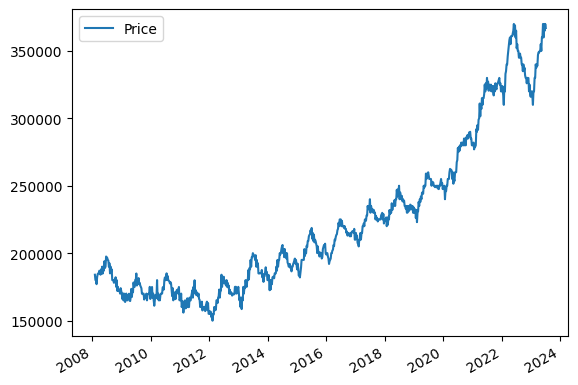

In [28]:
price_data.plot.line(y="Price", use_index=True)

In [29]:
#Take out inflation, to ONLY figure out house prices | Adding a new Adjusted Price
price_data["adj_price"] = price_data["Price"] / price_data["CPI"] * 100

<Axes: >

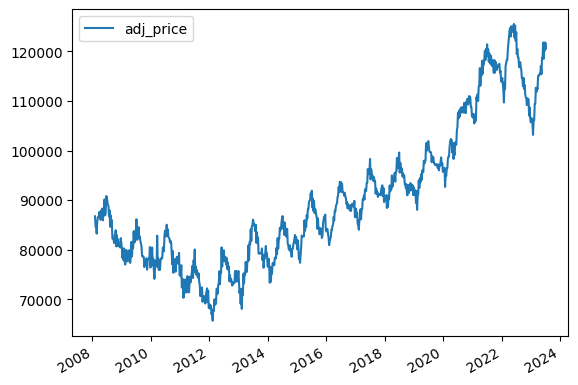

In [30]:
#Plot the adjusted price
price_data.plot.line(y="adj_price", use_index=True)

In [31]:
price_data["adj_value"] = price_data["Value"] / price_data["CPI"] * 100

In [32]:
#Set up target
#Prediction: What will happen to the house prices next quater? Will it go up or down

price_data["next_quarter"] = price_data["adj_price"].shift(-13)

In [33]:
price_data

,Interest Rate,Vacancy Rate,CPI,Price,Value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,184000.0,401212.995954,86721.275934,189096.211578,88286.680793
2008-02-09,5.67,10.1,212.687,180000.0,401212.995954,84631.406715,188640.112444,85916.880413
2008-02-16,5.72,10.1,212.687,180000.0,401212.995954,84631.406715,188640.112444,87822.014052
2008-02-23,6.04,10.1,212.687,177000.0,401212.995954,83220.88327,188640.112444,86892.680569
2008-03-01,6.24,10.1,212.687,182209.0,397709.751937,85670.022145,186992.976504,90145.347757
...,...,...,...,...,...,...,...,...
2023-06-10,6.71,6.3,303.841,360000.0,649728.075631,118483.02237,213838.183666,None
2023-06-17,6.69,6.3,303.841,370000.0,649728.075631,121774.217436,213838.183666,None
2023-06-24,6.67,6.3,303.841,365000.0,649728.075631,120128.619903,213838.183666,None
2023-07-01,6.71,6.3,303.841,370000.0,654138.217555,121774.217436,215289.6474,None


In [34]:
#Remove the null columns
price_data = price_data.dropna()

In [35]:
price_data

,Interest Rate,Vacancy Rate,CPI,Price,Value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,184000.0,401212.995954,86721.275934,189096.211578,88286.680793
2008-02-09,5.67,10.1,212.687,180000.0,401212.995954,84631.406715,188640.112444,85916.880413
2008-02-16,5.72,10.1,212.687,180000.0,401212.995954,84631.406715,188640.112444,87822.014052
2008-02-23,6.04,10.1,212.687,177000.0,401212.995954,83220.88327,188640.112444,86892.680569
2008-03-01,6.24,10.1,212.687,182209.0,397709.751937,85670.022145,186992.976504,90145.347757
...,...,...,...,...,...,...,...,...
2023-03-11,6.73,6.4,301.808,337500.0,643971.841892,111826.061602,213371.362552,118483.02237
2023-03-18,6.60,6.4,301.808,340000.0,643971.841892,112654.402799,213371.362552,121774.217436
2023-03-25,6.42,6.4,301.808,339000.0,643971.841892,112323.06632,213371.362552,120128.619903
2023-04-01,6.32,6.4,301.808,347000.0,644303.80176,114973.758151,213481.352966,121774.217436


In [36]:
price_data["Change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)

C:\Users\JK\AppData\Local\Temp\ipykernel_10628\4218193951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data["Change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)


In [37]:
price_data

,Interest Rate,Vacancy Rate,CPI,Price,Value,adj_price,adj_value,next_quarter,Change
2008-02-02,5.68,10.1,212.174,184000.0,401212.995954,86721.275934,189096.211578,88286.680793,1
2008-02-09,5.67,10.1,212.687,180000.0,401212.995954,84631.406715,188640.112444,85916.880413,1
2008-02-16,5.72,10.1,212.687,180000.0,401212.995954,84631.406715,188640.112444,87822.014052,1
2008-02-23,6.04,10.1,212.687,177000.0,401212.995954,83220.88327,188640.112444,86892.680569,1
2008-03-01,6.24,10.1,212.687,182209.0,397709.751937,85670.022145,186992.976504,90145.347757,1
...,...,...,...,...,...,...,...,...,...
2023-03-11,6.73,6.4,301.808,337500.0,643971.841892,111826.061602,213371.362552,118483.02237,1
2023-03-18,6.60,6.4,301.808,340000.0,643971.841892,112654.402799,213371.362552,121774.217436,1
2023-03-25,6.42,6.4,301.808,339000.0,643971.841892,112323.06632,213371.362552,120128.619903,1
2023-04-01,6.32,6.4,301.808,347000.0,644303.80176,114973.758151,213481.352966,121774.217436,1


In [38]:
price_data["Change"].value_counts()

Change
0    387
1    386
Name: count, dtype: int64

In [39]:
#Create our predictors to predict the target
predictors = ["Interest Rate", "Vacancy Rate", "adj_price", "adj_value"]
target = "Change"

In [40]:
#Creating a Machine Learning Model

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [42]:
START = 260
STEP = 52

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split = 10, random_state = 1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds

def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i + STEP)]
        all_preds.append(predict(train, test, predictors, target))

    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target], preds)

In [43]:
preds, accuracy = backtest(price_data, predictors, target)

In [44]:
accuracy

0.5750487329434698

In [45]:
#Improving our accuracy of the model

In [46]:
yearly = price_data.rolling(52, min_periods = 1).mean()

In [47]:
yearly

,Interest Rate,Vacancy Rate,CPI,Price,Value,adj_price,adj_value,next_quarter,Change
2008-02-02,5.680000,10.100000,212.174000,184000.000000,401212.995954,86721.275934,189096.211578,88286.680793,1.000000
2008-02-09,5.675000,10.100000,212.430500,182000.000000,401212.995954,85676.341324,188868.162011,87101.780603,1.000000
2008-02-16,5.690000,10.100000,212.516000,181333.333333,401212.995954,85328.029788,188792.145489,87341.858419,1.000000
2008-02-23,5.777500,10.100000,212.558750,180250.000000,401212.995954,84801.243158,188754.137228,87229.563957,1.000000
2008-03-01,5.870000,10.100000,212.584400,180641.800000,400512.347151,84974.998956,188401.905083,87812.720717,1.000000
...,...,...,...,...,...,...,...,...,...
2023-03-11,5.811923,5.915385,295.780288,341590.153846,656522.363986,115570.596514,222011.135204,113802.441537,0.384615
2023-03-18,5.864808,5.926923,296.055981,341590.153846,656679.156071,115462.558332,221861.048814,113782.232001,0.384615
2023-03-25,5.908269,5.938462,296.331673,341455.538462,656835.948157,115308.010606,221710.962424,113684.701911,0.384615
2023-04-01,5.944808,5.950000,296.607365,341399.769231,656999.124086,115178.348226,221562.991234,113677.542217,0.384615


In [48]:
yearly_ratios = [p + "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]

C:\Users\JK\AppData\Local\Temp\ipykernel_10628\3513181918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]
C:\Users\JK\AppData\Local\Temp\ipykernel_10628\3513181918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]
C:\Users\JK\AppData\Local\Temp\ipykernel_10628\3513181918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [49]:
price_data

,Interest Rate,Vacancy Rate,CPI,Price,Value,adj_price,adj_value,next_quarter,Change,Interest Rate_year,Vacancy Rate_year,adj_price_year,adj_value_year
2008-02-02,5.68,10.1,212.174,184000.0,401212.995954,86721.275934,189096.211578,88286.680793,1,1.000000,1.000000,1.0,1.0
2008-02-09,5.67,10.1,212.687,180000.0,401212.995954,84631.406715,188640.112444,85916.880413,1,0.999119,1.000000,0.987804,0.998793
2008-02-16,5.72,10.1,212.687,180000.0,401212.995954,84631.406715,188640.112444,87822.014052,1,1.005272,1.000000,0.991836,0.999195
2008-02-23,6.04,10.1,212.687,177000.0,401212.995954,83220.88327,188640.112444,86892.680569,1,1.045435,1.000000,0.981364,0.999396
2008-03-01,6.24,10.1,212.687,182209.0,397709.751937,85670.022145,186992.976504,90145.347757,1,1.063032,1.000000,1.008179,0.992522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-11,6.73,6.4,301.808,337500.0,643971.841892,111826.061602,213371.362552,118483.02237,1,1.157964,1.081925,0.9676,0.961084
2023-03-18,6.60,6.4,301.808,340000.0,643971.841892,112654.402799,213371.362552,121774.217436,1,1.125357,1.079818,0.975679,0.961734
2023-03-25,6.42,6.4,301.808,339000.0,643971.841892,112323.06632,213371.362552,120128.619903,1,1.086613,1.077720,0.974113,0.962385
2023-04-01,6.32,6.4,301.808,347000.0,644303.80176,114973.758151,213481.352966,121774.217436,1,1.063113,1.075630,0.998224,0.963524


In [50]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios,target)

In [51]:
accuracy

0.6101364522417154

In [53]:
#Run some diagnostics in our ML Model
#To figure out where our algorithm is making mistakes when predciting

In [55]:
#Comparing predicted value to our actual values, return True or False
pred_match = (preds == price_data[target].iloc[START:])

#Assign colours for our graph - True = Green, False = Red
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

<Axes: xlabel='index', ylabel='adj_price'>

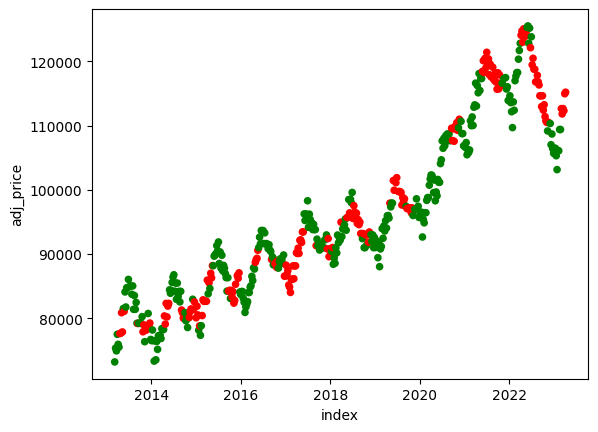

In [57]:
import matplotlib.pyplot as plt

#Copy our actual data
plot_data = price_data.iloc[START:].copy()

#plotting our data to see red or green
plot_data.reset_index().plot.scatter(x = "index", y = "adj_price", color = pred_match)

In [60]:
#Checking which columns are the most important to help model make decision
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=10, random_state = 1)
rf.fit(price_data[predictors], price_data[target])

#Check and see which variable is the most important to the RandomForest model and help it improve the prediciton
result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats = 10, random_state = 1)

In [62]:
result["importances_mean"]

array([0.12095731, 0.14075032, 0.28279431, 0.33868047])

In [63]:
predictors

['Interest Rate', 'Vacancy Rate', 'adj_price', 'adj_value']